In [16]:
import os
os.listdir('aclImdb')

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [17]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print ("tun text_train: {}".format(type(text_train)))
print("длина text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

tun text_train: <class 'list'>
длина text_train: 75000
text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes, some co

In [18]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [19]:
print("text_train[1]:\n{}".format(text_train[1]))

text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.  The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.  OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.  For the positives, you can take hot actresses, last 30 minutes, some comic scenes, good acting by the lead cast and the baby. Only problem is that these thi

In [20]:
import numpy as np
np.unique(y_train)

array([0, 1, 2])

In [21]:
print("Количество примеров на класс (обучение - training): {}".format(np.bincount(y_train)))

Количество примеров на класс (обучение - training): [12500 12500 50000]


In [37]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Количество документов в текстовых данных: {}".format(len(text_test)))
print("Количество примеров на класс test: {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Количество документов в текстовых данных: 25000
Количество примеров на класс test: [12500 12500]


In [22]:
bards_words=["I went and saw this movie last night after being coaxed to by a few friends of mine",
             "I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy",
             "I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism",
             "The sign of a good movie is that it can toy with our emotions",
             "This one did exactly that",
             "The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half.",
             "I went to an advance screening of this movie thinking I was about to embark on 120 minutes of cheezy lines, mindless plot, and the kind of nauseous acting that made 'The Postman' one of the most malignant displays of cinematic blundering of our time.",
             "But I was shocked. Shocked to find a film starring Costner that appealed to the soul of the audience.",
             "Shocked that a film starring both actually engaged and captured my own emotions.",
             "Kutcher seems to have tweaked the serious acting he played with in 'Butterfly Effect'", 
             "These two actors came into this film with a serious, focused attitude that shone through in what I thought was one of the best films I've seen this year.",
             "Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters",
             "Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care.",
             "The character we should really care about is a very cocky, overconfident Ashton Kutcher.",
             "The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet.",
             "His only obstacle appears to be winning over Costner.",
             "Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts.",
             "We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing.",
             "No magic here, it was all I could do to keep from turning it off an hour in."]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [24]:
print("Размер словаря: {}".format(len(vect.vocabulary_)))
print("Содержимое словаря:\n {}".format(vect.vocabulary_))

Размер словаря: 213
Содержимое словаря:
 {'went': 202, 'and': 12, 'saw': 152, 'this': 184, 'movie': 116, 'last': 102, 'night': 122, 'after': 8, 'being': 26, 'coaxed': 45, 'to': 188, 'by': 34, 'few': 66, 'friends': 77, 'of': 126, 'mine': 112, 'll': 106, 'admit': 6, 'that': 176, 'was': 198, 'reluctant': 150, 'see': 156, 'it': 93, 'because': 25, 'from': 78, 'what': 204, 'knew': 100, 'ashton': 20, 'kutcher': 101, 'he': 84, 'only': 131, 'able': 1, 'do': 53, 'comedy': 47, 'wrong': 211, 'played': 140, 'the': 177, 'character': 39, 'jake': 94, 'fischer': 72, 'very': 197, 'well': 201, 'kevin': 97, 'costner': 49, 'ben': 27, 'randall': 147, 'with': 210, 'such': 171, 'professionalism': 146, 'sign': 165, 'good': 80, 'is': 92, 'can': 36, 'toy': 190, 'our': 133, 'emotions': 61, 'one': 130, 'did': 51, 'exactly': 64, 'entire': 63, 'theater': 178, 'which': 206, 'sold': 167, 'out': 134, 'overcome': 136, 'laughter': 104, 'during': 56, 'first': 71, 'half': 81, 'were': 203, 'moved': 115, 'tears': 172, 'secon

In [25]:
bag_of_words = vect.transform(bards_words)
print(repr(bag_of_words))

<19x213 sparse matrix of type '<class 'numpy.int64'>'
	with 352 stored elements in Compressed Sparse Row format>


In [26]:
print("Плотное представление bag_of_words: \n{}".format(bag_of_words.toarray()))

Плотное представление bag_of_words: 
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")
# load_files возвращает коллекцию, содержащую обучающие тексты и обучающие
text_train, y_train = reviews_train.data, reviews_train.target

In [39]:
text_train = [doc. replace(b"<br />", b" ") for doc in text_train]

In [40]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [41]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train: \n{}".format(repr(X_train)))

X_train: 
<75000x124255 sparse matrix of type '<class 'numpy.int64'>'
	with 10315542 stored elements in Compressed Sparse Row format>


In [42]:
vect

CountVectorizer()

In [43]:
feature_names = vect.get_feature_names_out()
print("Количество признаков: {}".format(len(feature_names)))
print("Первые 20признаков: \n{}".format(feature_names[:20]))
print("Признаки с 20010по 20030:\n{}".format(feature_names [20010:20030]))
print("Kaждый 2000-й признак: \n{}".format(feature_names[::2000]))

Количество признаков: 124255
Первые 20признаков: 
['00' '000' '0000' '0000000000000000000000000000000001' '0000000000001'
 '000000001' '000000003' '00000001' '000001745' '00001' '0001' '00015'
 '0002' '0007' '00083' '000ft' '000s' '000th' '001' '002']
Признаки с 20010по 20030:
['cheapen' 'cheapened' 'cheapening' 'cheapens' 'cheaper' 'cheapest'
 'cheapie' 'cheapies' 'cheapjack' 'cheaply' 'cheapness' 'cheapo'
 'cheapozoid' 'cheapquels' 'cheapskate' 'cheapskates' 'cheapy' 'chearator'
 'cheat' 'cheata']
Kaждый 2000-й признак: 
['00' '_require_' 'aideed' 'announcement' 'asteroid' 'banquière'
 'besieged' 'bollwood' 'btvs' 'carboni' 'chcialbym' 'clotheth'
 'consecration' 'cringeful' 'deadness' 'devagan' 'doberman' 'duvall'
 'endocrine' 'existent' 'fetiches' 'formatted' 'garard' 'godlie' 'gumshoe'
 'heathen' 'honoré' 'immatured' 'interested' 'jewelry' 'kerchner' 'köln'
 'leydon' 'lulu' 'mardjono' 'meistersinger' 'misspells' 'mumblecore'
 'ngah' 'oedpius' 'overwhelmingly' 'penned' 'pleading' 'p

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Средняя правильность перекрестной проверки: {:.2f}".format(np.mean(scores)))

C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Средняя правильность перекрестной проверки: 0.67


C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Налучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Налучшее параметры: ", grid.best_params_)

C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Налучшее значение перекрестной проверки: 0.68
Налучшее параметры:  {'C': 0.01}


C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
X_test = vect.transform(text_test)
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))

Правильность на тестовом наборе: 0.11


In [47]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect. transform(text_train)
print("X_train c min_df: {}".format(repr(X_train)))

X_train c min_df: <75000x44532 sparse matrix of type '<class 'numpy.int64'>'
	with 10191240 stored elements in Compressed Sparse Row format>


In [48]:
feature_names = vect.get_feature_names_out()

print("Первые 50признаков: \n{}".format(feature_names[:50]))
print("Признаки с 20010 по 20030: \n{}".format(feature_names[20010:20030]))
print("Каждый 700-й признак: \n{}".format(feature_names[::700]))

Первые 50признаков: 
['00' '000' '001' '007' '00am' '00pm' '00s' '01' '02' '03' '04' '05' '06'
 '07' '08' '09' '10' '100' '1000' '1001' '100k' '100th' '100x' '101'
 '101st' '102' '103' '104' '105' '106' '107' '108' '109' '10am' '10pm'
 '10s' '10th' '10x' '11' '110' '1100' '110th' '111' '112' '1138' '115'
 '116' '117' '11pm' '11th']
Признаки с 20010 по 20030: 
['inert' 'inertia' 'inescapable' 'inescapably' 'inevitability'
 'inevitable' 'inevitably' 'inexcusable' 'inexcusably' 'inexhaustible'
 'inexistent' 'inexorable' 'inexorably' 'inexpensive' 'inexperience'
 'inexperienced' 'inexplicable' 'inexplicably' 'inexpressive'
 'inextricably']
Каждый 700-й признак: 
['00' 'accountability' 'alienate' 'appetite' 'austen' 'battleground'
 'bitten' 'bowel' 'burton' 'cat' 'choreographing' 'collide' 'constipation'
 'creatively' 'dashes' 'descended' 'dishing' 'dramatist' 'ejaculation'
 'epitomize' 'extinguished' 'figment' 'forgot' 'garnished' 'goofy' 'gw'
 'hedy' 'hormones' 'imperfect' 'insomniac' 'ja

In [50]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Наилучшее значение перекрестной проверки: 0.68


C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3>Стоп слова</h3>

In [51]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Количество стоп слова:{}".format(len(ENGLISH_STOP_WORDS)))
print("Каждое 10 стоп слова:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Количество стоп слова:318
Каждое 10 стоп слова:
['i', 'already', 'do', 'two', 'if', 'anything', 'along', 'amongst', 'nevertheless', 'toward', 'above', 'becoming', 'its', 'herself', 'afterwards', 'other', 'ever', 'wherever', 'go', 'should', 'get', 'yet', 'such', 'therein', 'since', 'myself', 'formerly', 'empty', 'me', 'eg', 'now', 'front']


In [52]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train с использованием стоп-слов: \nf{}".format(repr(X_train)))

X_train с использованием стоп-слов: 
f<75000x44223 sparse matrix of type '<class 'numpy.int64'>'
	with 6577418 stored elements in Compressed Sparse Row format>


In [53]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Налучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Налучшее значение перекрестной проверки: 0.71


C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3>Масштабирование данных с помощью tf-idf</h3>

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer (min_df=5, norm=None), LogisticRegression(max_iter=100))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}". format(grid.best_score_))

C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Наилучшее значение перекрестной проверки: 0.72


C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# преобразуем обучающий набор данных
X_train = vectorizer.transform(text_train)
# находим максимальное значение каждого признака по набору данных
max_value = X_train.max(axis=0). toarray().ravel()
sorted_by_tfidf = max_value.argsort()
print("Признаки с наименьшими значениями tfidf: \nf{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfidf: \nf{}".format(feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf: 
f['remained' 'acclaimed' 'combines' 'rapidly' 'uniformly' 'diverse'
 'avoiding' 'fills' 'feeble' 'admired' 'wherever' 'admission' 'abound'
 'starters' 'assure' 'pivotal' 'comprehend' 'deliciously' 'strung'
 'inadvertently']
Признаки с наибольшими значениями tfidf: 
f['nukie' 'reno' 'dominick' 'taz' 'ling' 'rob' 'victoria' 'turtles'
 'khouri' 'lorenzo' 'id' 'zizek' 'elwood' 'nikita' 'rishi' 'timon'
 'titanic' 'zohan' 'pammy' 'godzilla']


In [59]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'one' 'be' 'have' 'are' 'film' 'you' 'all'
 'at' 'an' 'by' 'from' 'so' 'like' 'who' 'there' 'they' 'his' 'if' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'can' 'good' 'when' 'more'
 'up' 'time' 'very' 'even' 'only' 'no' 'see' 'would' 'my' 'story' 'really'
 'which' 'well' 'had' 'me' 'than' 'their' 'much' 'were' 'get' 'other' 'do'
 'been' 'most' 'also' 'into' 'don' 'her' 'first' 'great' 'how' 'made'
 'people' 'will' 'make' 'because' 'way' 'could' 'bad' 'we' 'after' 'them'
 'too' 'any' 'then' 'movies' 'watch' 'she' 'think' 'seen' 'acting' 'its'
 'characters']


<h3>Исследование коэффициентов модели</h3>

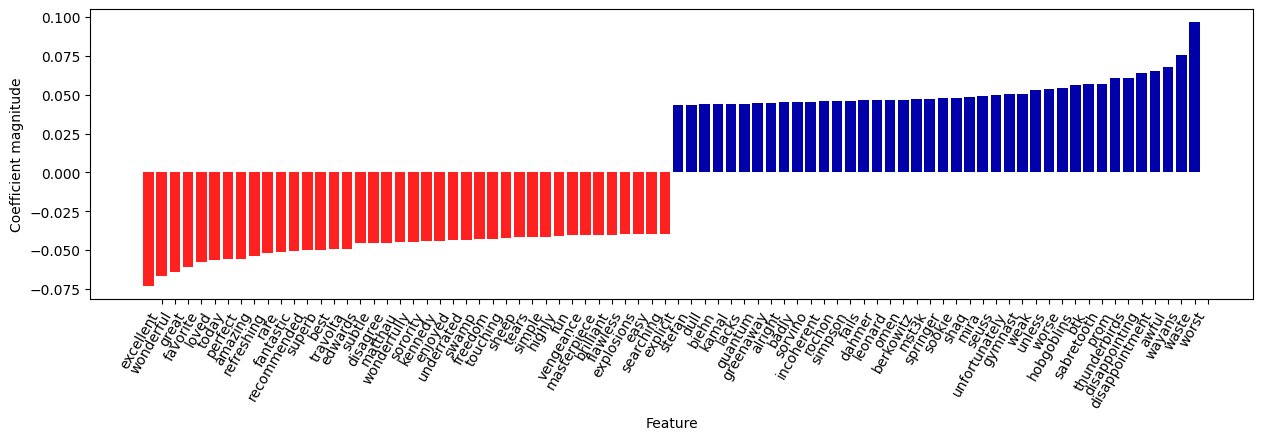

In [65]:
import mglearn

# Предполагается, что grid.best_estimator_ содержит вашу модель
best_model = grid.best_estimator_

# Получаем коэффициенты модели (предположим, что у нас бинарная классификация)
coefficients = best_model.named_steps["logisticregression"].coef_[0]

# Визуализируем коэффициенты
mglearn.tools.visualize_coefficients(coefficients, feature_names, n_top_features=40)

<h4>Анализ, проведенный в ходе исследования, раскрывает важные аспекты, которые лежат в основе классификации текстов. Полученные результаты не только расширяют наше понимание воздействия слов, но также подсказывают о возможности углубленного анализа отзывов и создания более точных систем выделения ключевых тем и анализа настроений. Это открывает новые горизонты для применения этих знаний в практических областях, таких как управление репутацией или разработка персонализированных систем обработки текстов.</h4>